# Data @ ANZ Virtual Experience Program
# Predictive Data Analysis

## Background Information
The data set below contains transations of 100 hypothetical customers over the course of three months. It contains useful information including customer name and identity, as well as transaction amounts and currency. In this notebook, we will conduct predictive data analysis on the data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_excel('anz.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

Identifying the annual salary of each customer. Since there is no column indicating one's salary, we must use the given transactions to deduce the annual salaries.

In [4]:
# Assume monthly salary is the largest deposit value
# Multiply largest value by 12 to get annual salary
annual_sal = df.groupby('customer_id').max()['amount']*12
annual_sal

customer_id
CUS-1005756958    11645.64
CUS-1117979751    42943.80
CUS-1140341822    22998.12
CUS-1147642491    20536.68
CUS-1196156254    46844.76
                    ...   
CUS-72755508      14160.00
CUS-809013380     16596.00
CUS-860700529     21703.44
CUS-880898248     17207.76
CUS-883482547     47729.52
Name: amount, Length: 100, dtype: float64

Below is a histogram demonstrating the distribution of annual incomes across all customers in the data set. It is right-skewed or positively-skewed.

[Text(0.5, 0, 'annual salary')]

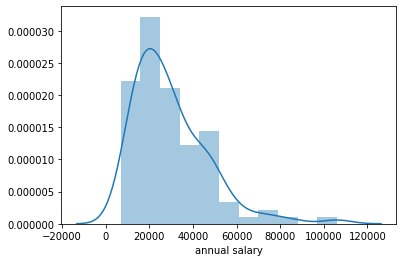

In [5]:
sns.distplot(annual_sal).set(xlabel='annual salary')

Matching up annual salaries with customer_ids, age, and gender.

In [6]:
grouped_df = df.groupby('customer_id', as_index=True).max()[['age','gender']]
grouped_df['annual_salary'] = annual_sal
grouped_df

,age,gender,annual_salary
customer_id,,,
CUS-1005756958,53,F,11645.64
CUS-1117979751,21,M,42943.80
CUS-1140341822,28,M,22998.12
CUS-1147642491,34,F,20536.68
CUS-1196156254,34,F,46844.76
...,...,...,...
CUS-72755508,35,F,14160.00
CUS-809013380,21,F,16596.00
CUS-860700529,30,M,21703.44


The scatterplot below displays the relationship between a customer's age and annual salary. There doesn't seem to be a linear correlation between the two, but there might possibly be a different relationship between the two. Finding the log or square root of salary and plotting relationship between that and age do not show visibly distinct relationships either.

Text(0.5, 1.0, 'Annual Salary vs Age')

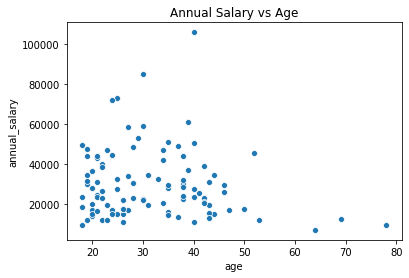

In [7]:
sns.scatterplot(x='age',y='annual_salary',data=grouped_df).set_title('Annual Salary vs Age')

In [8]:
grouped_df['log_salary'] = np.log(grouped_df['annual_salary'])

Text(0.5, 1.0, 'Log Annual Salary vs Age')

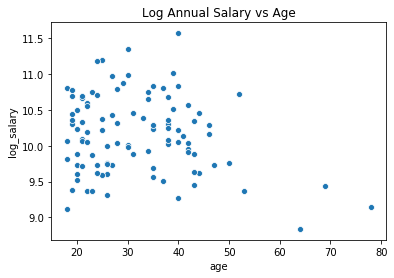

In [9]:
sns.scatterplot(x='age',y='log_salary',data=grouped_df).set_title('Log Annual Salary vs Age')

In [10]:
grouped_df['sqrt_salary'] = np.sqrt(grouped_df['annual_salary'])

Text(0.5, 1.0, 'Sqrt Annual Salary vs Age')

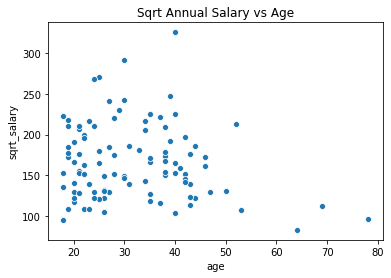

In [11]:
sns.scatterplot(x='age',y='sqrt_salary',data=grouped_df).set_title('Sqrt Annual Salary vs Age')

An attempt to break down the plot further by gender also does not reveal any plausible relationship.

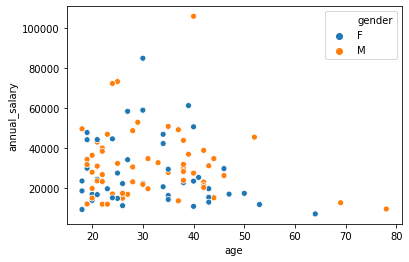

In [12]:
sns.scatterplot(x="age", y="annual_salary", hue="gender", data=grouped_df)

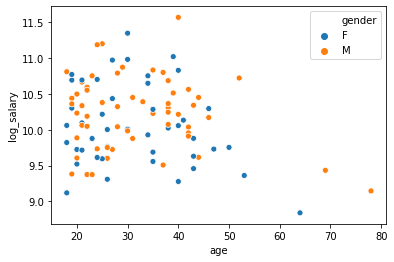

In [13]:
sns.scatterplot(x="age", y="log_salary", hue="gender", data=grouped_df)

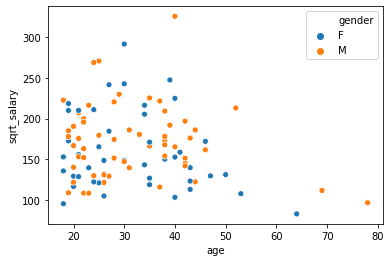

In [14]:
sns.scatterplot(x="age", y="sqrt_salary", hue="gender", data=grouped_df)

Now, let us plot annual salaries with balances and amounts and see if there could be any underlying relationships. Matching annual salaries with customer id, balance, and amount.

In [15]:
grouped_df2 = df.groupby('customer_id', as_index=True).sum()[['balance','amount']]
grouped_df2['annual_salary'] = annual_sal
grouped_df2

,balance,amount,annual_salary
customer_id,,,
CUS-1005756958,166137.20,16268.97,11645.64
CUS-1117979751,982992.90,33984.37,42943.80
CUS-1140341822,455936.98,17010.60,22998.12
CUS-1147642491,1065875.26,28980.82,20536.68
CUS-1196156254,5456746.27,36050.72,46844.76
...,...,...,...
CUS-72755508,260858.31,11438.37,14160.00
CUS-809013380,465855.96,18810.09,16596.00
CUS-860700529,806710.31,18099.88,21703.44


The scatterplot showing  total transaction amount and annual salary don't seem to show any significant relationship. It can be argued that the scatterplot shows a positive linear relationship, but it is hard to conclude because the data is heteroscedastic and outliers significantly skew the data.

Text(0.5, 1.0, 'Annual Salary vs Amount')

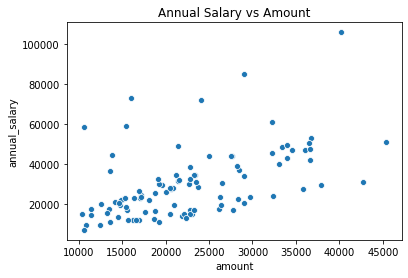

In [16]:
sns.scatterplot(x='amount',y='annual_salary',data=grouped_df2).set_title('Annual Salary vs Amount')

Maybe the data doesn't share a linear relationship, but something else like a log relationship or square root relationship. The plots below demonstrate Log Annual Salary vs Amount and Square Root Annual Salary vs Amount. Doing so seems to better describe the relationship between annual salary and amount better than simply a linear one.

In [17]:
grouped_df2['log_salary'] = np.log(grouped_df['annual_salary'])

Text(0.5, 1.0, 'Log Annual Salary vs Amount')

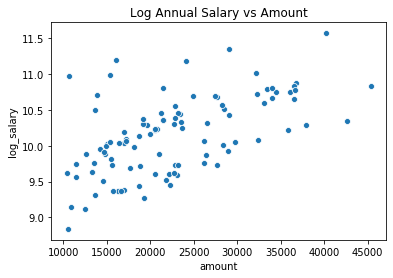

In [18]:
sns.scatterplot(x='amount',y='log_salary',data=grouped_df2).set_title('Log Annual Salary vs Amount')

In [19]:
grouped_df2['sqrt_salary'] = np.sqrt(grouped_df['annual_salary'])

Text(0.5, 1.0, 'Sqrt Annual Salary vs Amount')

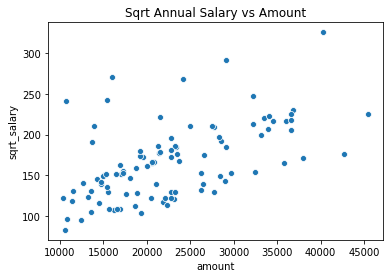

In [20]:
sns.scatterplot(x='amount',y='sqrt_salary',data=grouped_df2).set_title('Sqrt Annual Salary vs Amount')

The scatterplot showing  total balance and annual salary don't seem to show any significant relationship, besides the fact that balance doesn't seem to fluctuate much, even when annual salaries fluctuate a lot.

Text(0.5, 1.0, 'Annual Salary vs Balance')

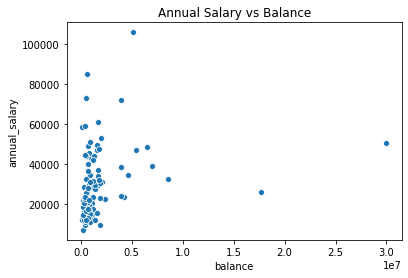

In [21]:
sns.scatterplot(x='balance',y='annual_salary',data=grouped_df2).set_title('Annual Salary vs Balance')

Here, we will begin to build a simple regression model to predict the annual salary for each customer. First off, we need to extract the columns of interest.

In [22]:
merged = pd.merge(grouped_df[['age','gender']], grouped_df2[['amount','annual_salary']], left_index=True, right_index=True)
merged

,age,gender,amount,annual_salary
customer_id,,,,
CUS-1005756958,53,F,16268.97,11645.64
CUS-1117979751,21,M,33984.37,42943.80
CUS-1140341822,28,M,17010.60,22998.12
CUS-1147642491,34,F,28980.82,20536.68
CUS-1196156254,34,F,36050.72,46844.76
...,...,...,...,...
CUS-72755508,35,F,11438.37,14160.00
CUS-809013380,21,F,18810.09,16596.00
CUS-860700529,30,M,18099.88,21703.44


Then, we break up the data into training set and testing set.

In [23]:
X = merged.drop('annual_salary', axis=1)
y = merged.annual_salary
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

Next, we will transform the columns into usable features.

In [24]:
identity = FunctionTransformer(lambda x:x, validate=True) # for age
nominal = OneHotEncoder() # for gender
sqrt = FunctionTransformer(np.sqrt, validate=True) # scaling by square root for amount

In [25]:
preproc = ColumnTransformer([('ohe',nominal,['gender']),\
                             ('sqrt',sqrt,['amount']),\
                             ('identity',identity,['age'])])

Fitting the model to the training data, a linear regression model.

In [26]:
pipeline = Pipeline([('feat',preproc),\
                     ('lin-reg',LinearRegression())])
pipeline.fit(X_train,y_train);

Scoring the model's predictions against actual data results in very low scores. The model is therefore inaccurate at predicting a given customer's annual salary. This tells us that a linear regression may not be the best option. ANZ should not use this model to segment customers since to predict customers' income bracket because it is very inaccurate. It is best to either come up with a new model or collect more data to produce a more reliable model.

In [27]:
preds_train = pipeline.predict(X_train)
pipeline.score(X_train, y_train)

0.2552738708800406

In [28]:
preds_train = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.1780414340384493

Similarly, we  build a decision-tree regressor model to predict annual salaries. It also produces low scores when predicting on the testing data, hence the model is not reliable as well. More data neets to be collected to produce a reliable model that can generalize customers (ie. there is low bias but high variance, but we want to have low values for both).

In [29]:
pipeline_regressor = Pipeline([('feat',preproc),\
                     ('regressor',DecisionTreeRegressor())])
pipeline_regressor.fit(X_train,y_train);

In [30]:
preds_train = pipeline_regressor.predict(X_train)
pipeline_regressor.score(X_train, y_train)

1.0

In [31]:
preds_train = pipeline_regressor.predict(X_test)
pipeline_regressor.score(X_test, y_test)

-0.1928417075936253

Below, we set the max_depth parameter to 3. When we set a limit to max_depth, the score for the training data becomes lower while the score for the testing data becomes higher. This is because the model better generalizes to unseen data and doesn't overfit to the training data. However, although scores are still low, therefore a new model still needs to be in place.

In [32]:
pipeline_regressor = Pipeline([('feat',preproc),\
                     ('regressor',DecisionTreeRegressor(max_depth=3))])
pipeline_regressor.fit(X_train,y_train);

In [33]:
preds_train = pipeline_regressor.predict(X_train)
pipeline_regressor.score(X_train, y_train)

0.4034957704547949

In [34]:
preds_train = pipeline_regressor.predict(X_test)
pipeline_regressor.score(X_test, y_test)

0.1736243757115965